# Bike Sharing Demand

<a id="intro"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            1. Introduction
            </span>   
        </font>    
</h2>

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
            Problem Statement
            </span>   
        </font>    
</h3>

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system. 

A **US** bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 

The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

<a id="intro"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            2. Setting Up Jupyter Notebbok
            </span>   
        </font>    
</h2>

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
            Supress Warnings
            </span>   
        </font>    
</h3>

In [4]:
import warnings
warnings.filterwarnings("ignore")

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
            Imports Dependencies
            </span>   
        </font>    
</h3>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import missingno as mn
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
%matplotlib inline

# setting up plot style 
style.use('seaborn-poster')
style.use('fivethirtyeight')

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
            Modifying Jupyter Views
            </span>   
        </font>    
</h3>

In [6]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

<a id="import"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            3. Reading & Understanding the data
            </span>   
        </font>    
</h2>

In [16]:
# Reading csv file from the working directory
bikeDF = pd.read_csv("data/day.csv")

In [17]:
bikeDF.head() # top 5 rows of the data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [18]:
bikeDF.tail() # top 5 last rows of the data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [19]:
# Print data dimension
print(f"Dimension of loan data: {bikeDF.shape}")

# Print data size
print(f"Size of loan data: {bikeDF.size}")

Dimension of loan data: (730, 16)
Size of loan data: 11680


- Here we have 730 rows and 16 columns
- Total number of cell in the dataframe is 11680

In [20]:
bikeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- Based on the above information, we can say that in this dataframe we have total 15 numerical columns and 1 categorical columns.

In [22]:
# Let's check the statistical summary of the numerical columns in the dataframe
bikeDF.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Checking null values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

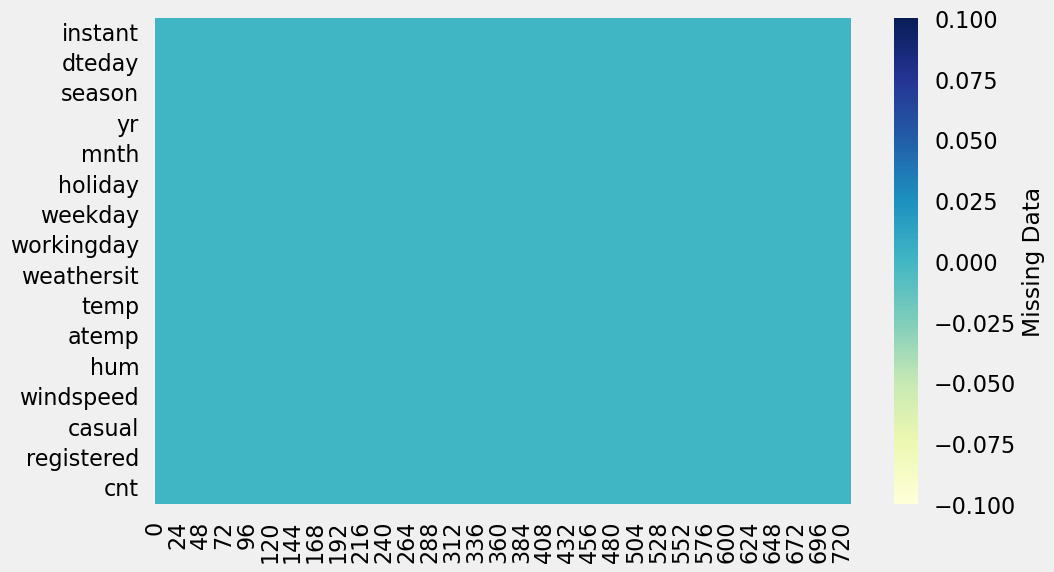

In [23]:
# Visualizing Null Value
plt.figure(figsize=(10,6))
sns.heatmap(bikeDF.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.show()

- No null values present in the given dataset

<a id="clean"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            4. Data Cleansing & Manipulation
            </span>   
        </font>    
</h2>

In [24]:
bikeDF.sample(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
47,48,17-02-2018,1,0,2,0,4,1,1,17.869153,21.43290,50.5,15.416968,259,2216,2475
59,60,01-03-2018,1,0,3,0,2,1,1,10.933347,13.19395,53.5,14.500475,137,1714,1851


<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
            instant column
            </span>   
        </font>    
</h3>

- Since **instant** column is record index, We will drop it

In [25]:
# Dropping "instant" column
bikeDF.drop(['instant'],axis=1,inplace=True)

In [26]:
bikeDF.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
            casual, registered and cnt column
            </span>   
        </font>    
</h3>

- The variable 'casual' indicates the number casual users who have made a rental. 
- The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. 
- Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered.
- The model should be built taking this 'cnt' as the target variable. 
- So here we will drop  **casual** and **registered** columns

In [32]:
# Dropping casual and registered columnsa as there is cnt column which is sum of the both that is the target column
bikeDF.drop(['casual','registered'], axis = 1, inplace = True)

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
            dteday column
            </span>   
        </font>    
</h3>

- We already have month and weekday columns to work with, so we can drop **dteday** column
- Also 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. 

In [33]:
# Dropping dteday as we already have month and weekday columns to work with
# Also 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. 
bikeDF.drop(['dteday'],axis=1, inplace=True)

In [34]:
bikeDF.tail(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
720,1,1,12,0,6,0,1,10.899153,11.80565,44.1250,27.292182,1749
721,1,1,12,0,0,0,1,10.079153,12.97355,51.5417,8.916561,1787
722,1,1,12,0,1,1,2,9.483464,12.94500,79.1304,5.174437,920
723,1,1,12,1,2,0,2,11.943464,14.72325,73.4783,11.304642,1013
724,1,1,12,0,3,1,3,9.976653,11.01665,82.3333,21.208582,441
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796
729,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,2729


In [35]:
bikeDF.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'], dtype='object')

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
            season column
            </span>   
        </font>    
</h3>

- As per data dictionary: 
- 1:spring, 2:summer, 3:fall, 4:winter

In [38]:
# Value counts of season
bikeDF.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [39]:
# Mapping season feature
bikeDF['season'] = bikeDF['season'].map({1:'spring', 
                                         2:'summer', 
                                         3:'fall' , 
                                         4:'winter'})

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
             weathersit column
            </span>   
        </font>    
</h3>

As per data dictionary:

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [40]:
# Value count of weathersit 
bikeDF.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [41]:
# Mapping weathersit feature
bikeDF['weathersit']=bikeDF['weathersit'].map({1:"Clear_Few Clouds", 2:"Mist_cloudy", 
                                           3:"Light rain_Light snow_Thunderstorm",
                                           4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'})

In [42]:
bikeDF.sample(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
336,winter,0,12,0,6,0,Clear_Few Clouds,12.265847,15.5302,61.2917,6.417481,3614
157,summer,0,6,0,2,1,Clear_Few Clouds,29.007500,32.7975,59.7917,12.583136,4833


<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
             weekday and mnth column
            </span>   
        </font>    
</h3>

- mnth : month ( 1 to 12)
- weekday : day of the week

In [43]:
# Value count of weekday
bikeDF.weekday.value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [44]:
# Value count of mnth
bikeDF['mnth'].value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [45]:
# Mapping weekday as per date as 1st january 2018 is "monday" and for this date weekday in dataset is 6, therfore I mapped 0:tuesday, 1: wednesday, etc.
bikeDF['weekday']=bikeDF['weekday'].map({0:"Tuesday",
                                         1:"Wednesday",
                                         2:"Thursday",
                                         3:"Friday",
                                         4:"Saturday",
                                         5:"Sunday",
                                         6:"Monday"})

In [48]:
# Mapping mnth Column
bikeDF['mnth']=bikeDF['mnth'].map({1: 'jan',2: 'feb',
                                   3: 'mar',4: 'apr',
                                   5: 'may',6: 'jun',
                                   7: 'jul',8: 'aug',
                                   9: 'sept',10: 'oct',
                                   11: 'nov',12: 'dec'})

In [49]:
# Value count of weekday
bikeDF.weekday.value_counts()

Monday       105
Tuesday      105
Wednesday    105
Thursday     104
Saturday     104
Sunday       104
Friday       103
Name: weekday, dtype: int64

In [50]:
bikeDF.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,Monday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Tuesday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [51]:
bikeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


<a id="clean"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            5. EDA (Exploratory data analysis)
            </span>   
        </font>    
</h2>

In [55]:
# Get numeric columns
numeric_columns = bikeDF.select_dtypes(include=['number']).columns.tolist()

# Get categorical columns
categorical_columns = bikeDF.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)

Numeric Columns: ['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
Categorical Columns: ['season', 'mnth', 'weekday', 'weathersit']


<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
             Analysis on numerical variables
            </span>   
        </font>    
</h3>

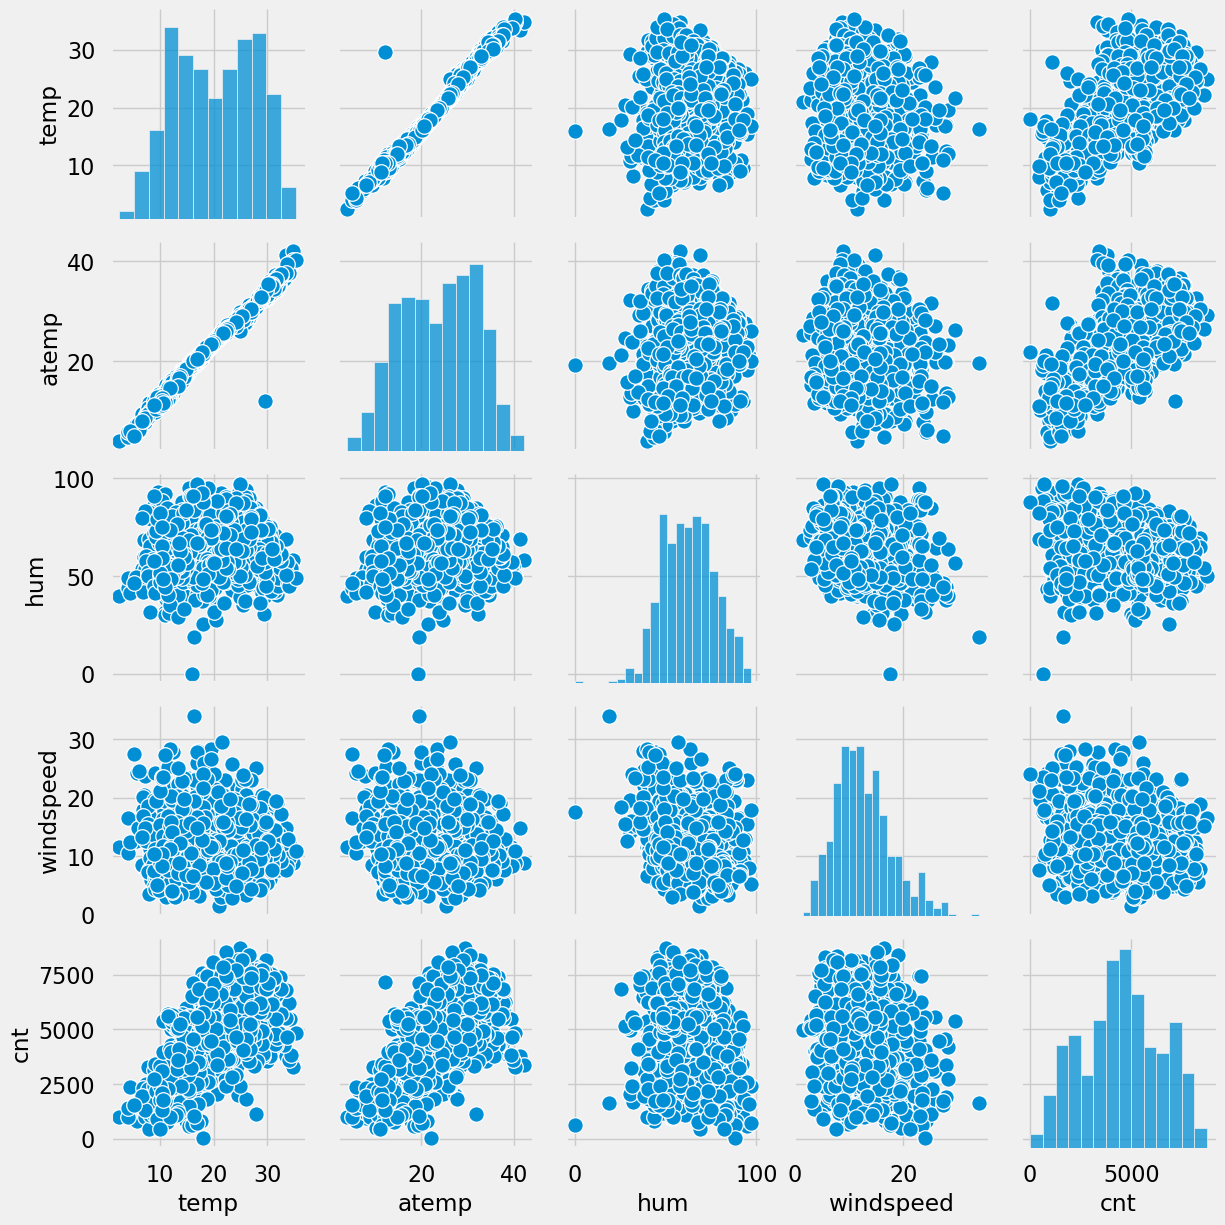

In [57]:
# pairplot to check numerical variables
sns.pairplot(bikeDF,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

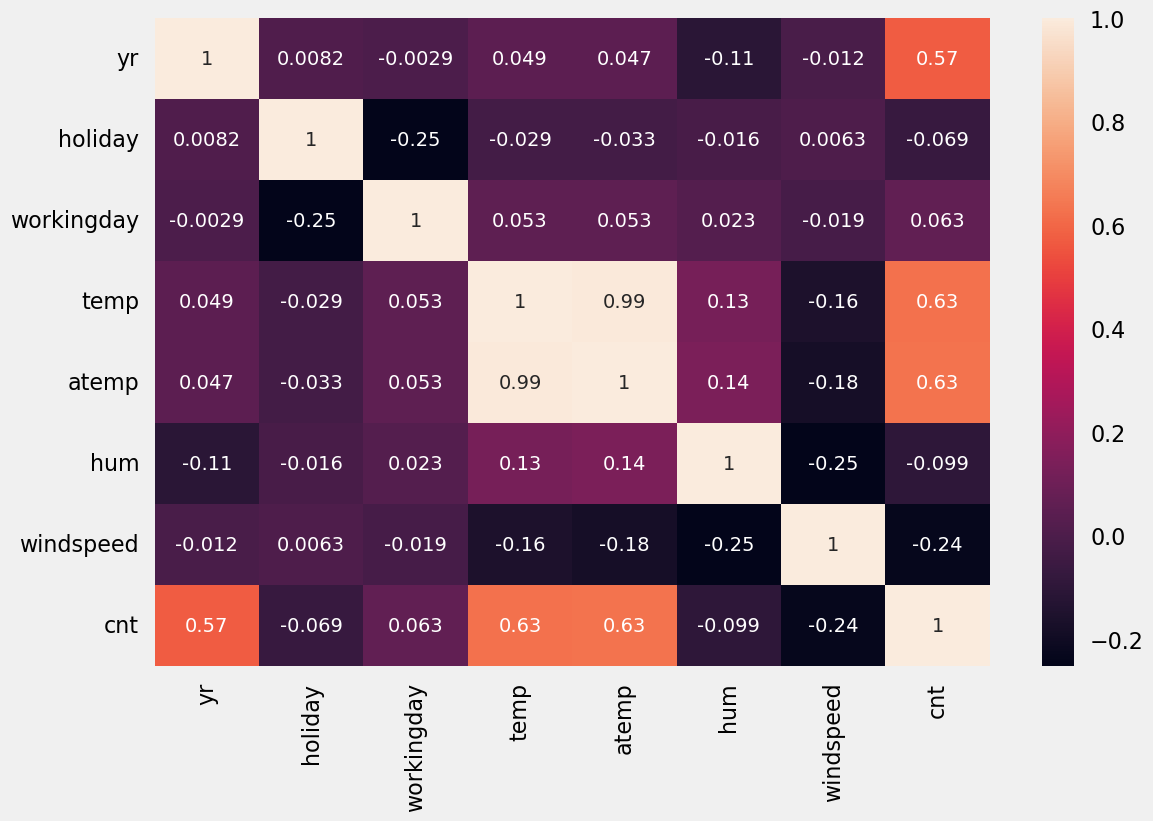

In [61]:
plt.figure(figsize=(12,8))
sns.heatmap(bikeDF.corr(),annot=True)
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Observation: </b><br>
        
- It can be observed that "temp" and "atemp" has highest +ve correlation with "cnt" variable. 
- Also, "temp" and "atemp" are highly correlated with each other.
        
    </span>    
</div>

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
             Analysis on categorical variables
            </span>   
        </font>    
</h3>

In [63]:
categorical_columns

['season', 'mnth', 'weekday', 'weathersit']

In [65]:
columns_for_box_plot = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]

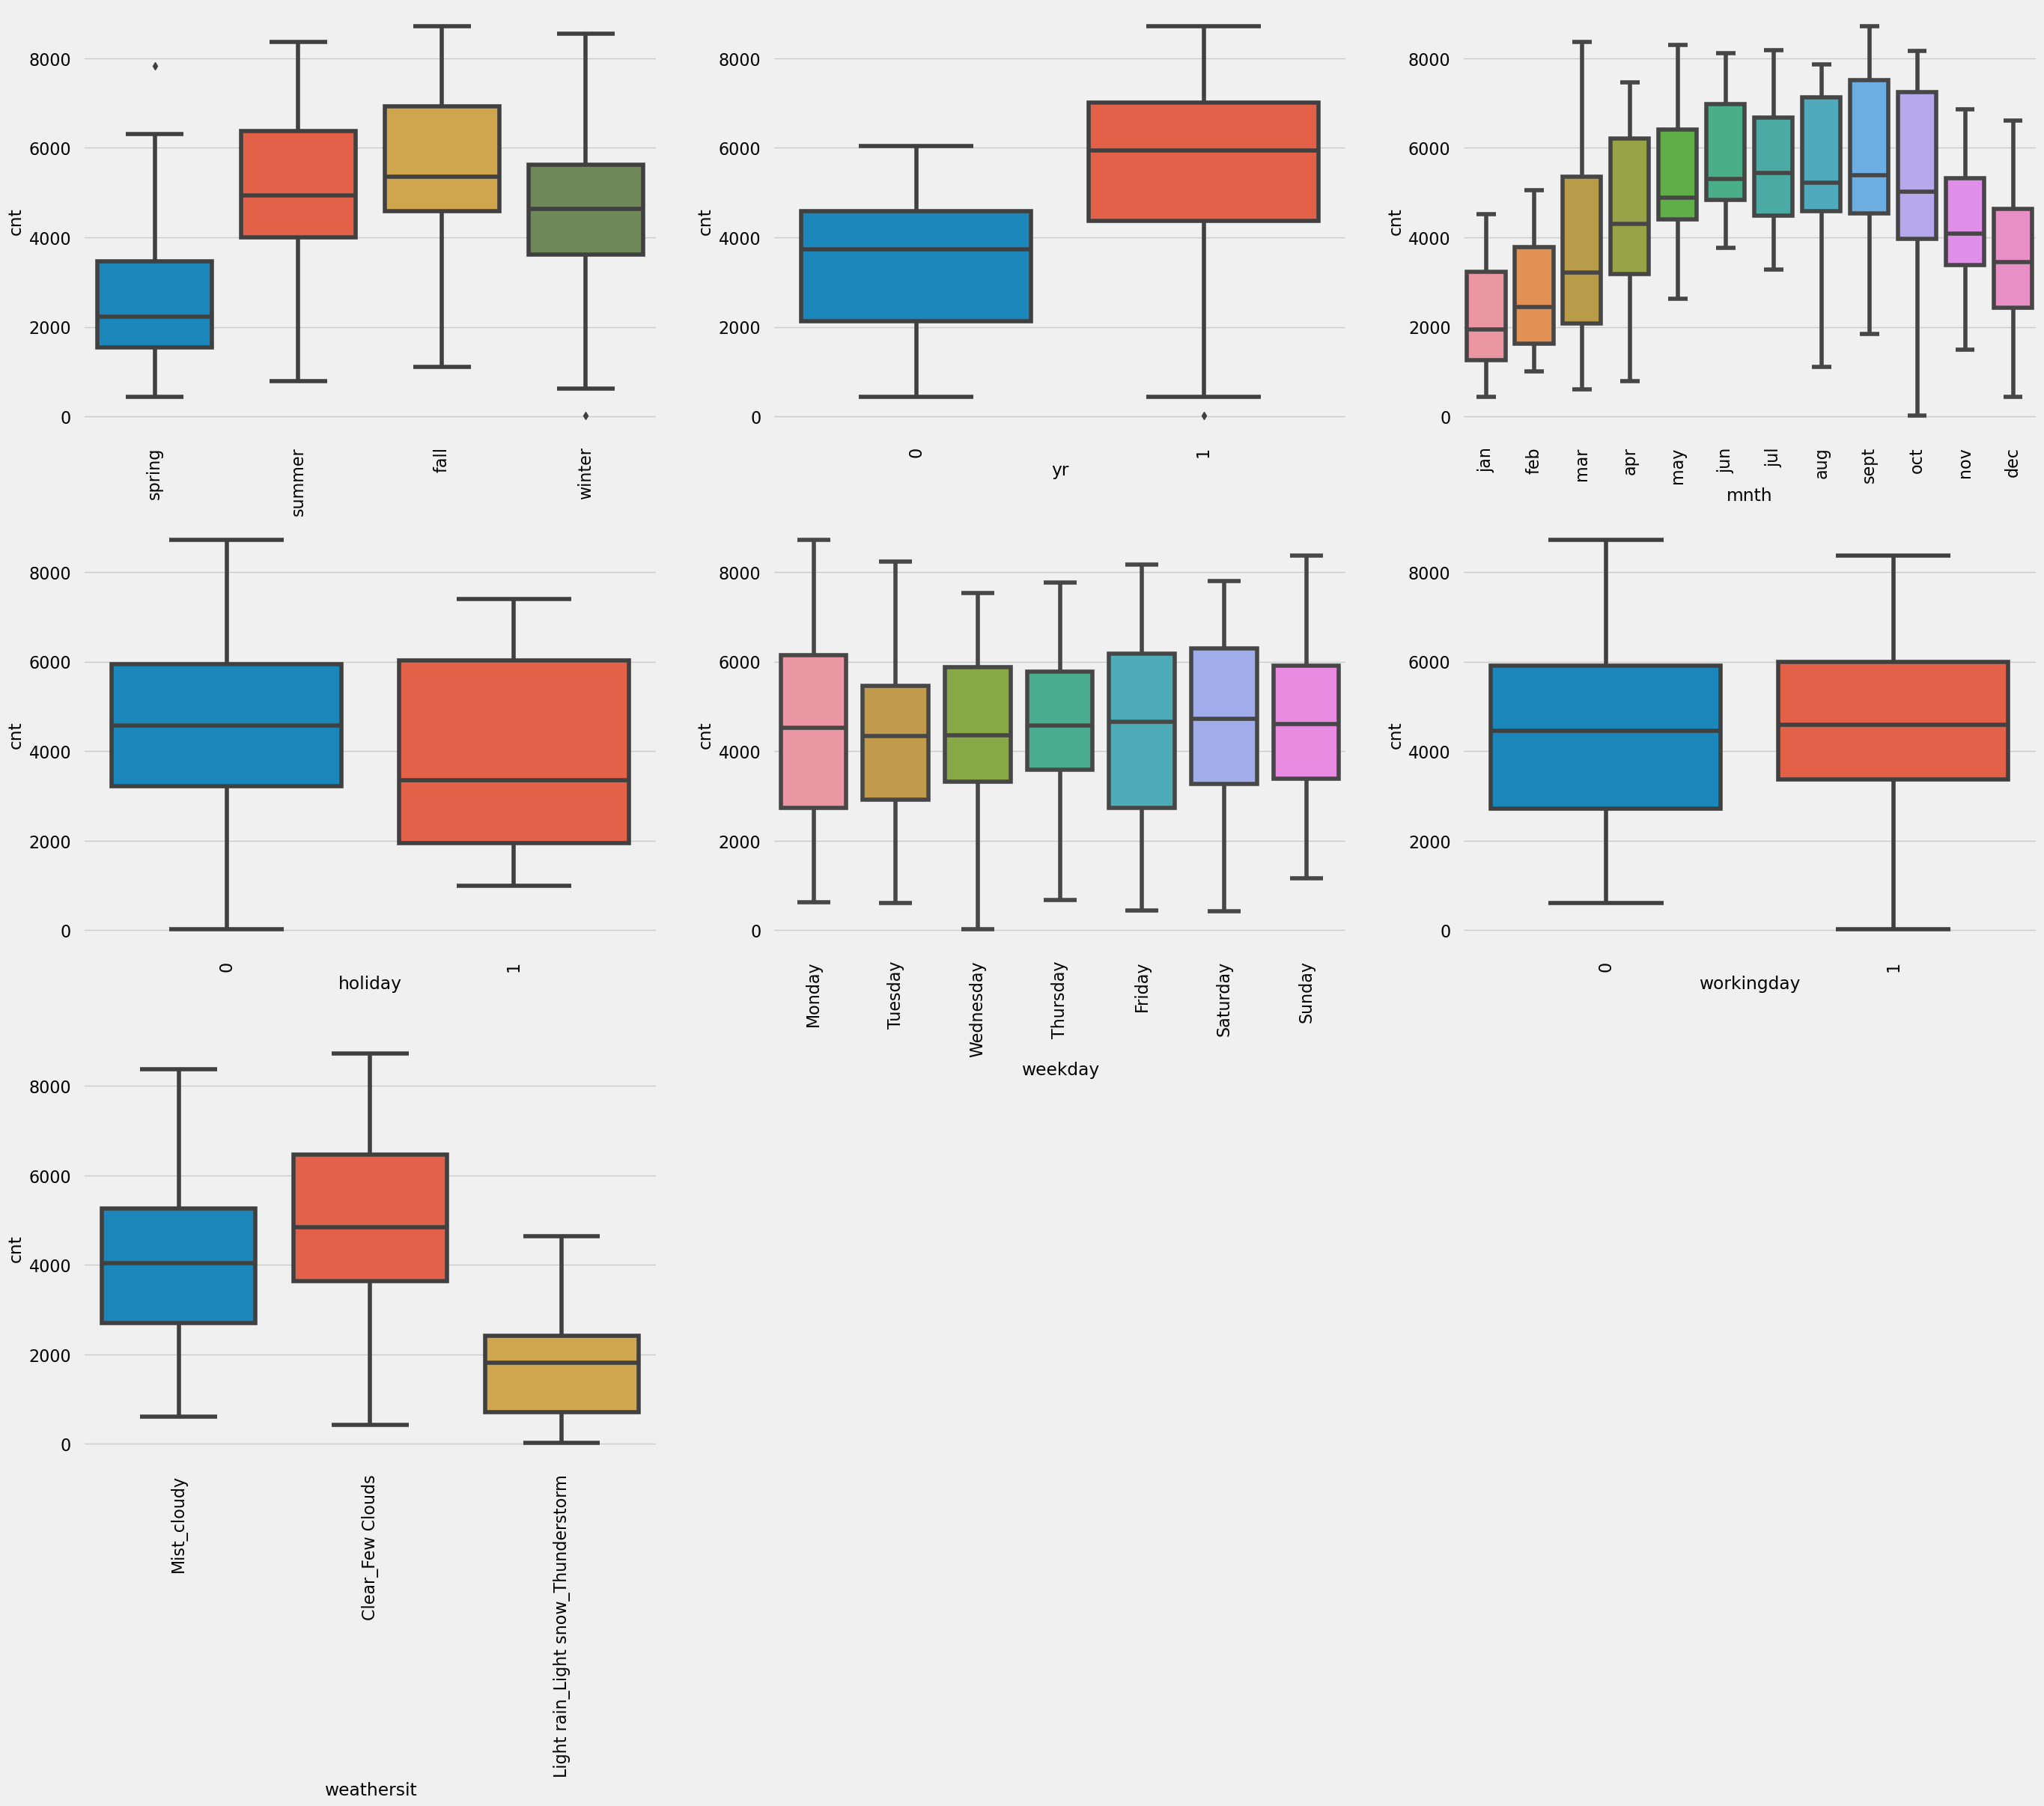

In [68]:
num_rows = (len(columns_for_box_plot) - 1) // 3 + 1
num_cols = min(len(columns_for_box_plot), 3)

plt.figure(figsize=(num_cols * 10, num_rows * 8))

for i, col in enumerate(columns_for_box_plot, start=1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=col, y='cnt', data=bikeDF)
    plt.xticks(rotation=90)
    
plt.tight_layout()
plt.show()

<a id="clean"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            6. Data Preperation
            </span>   
        </font>    
</h2>

In [70]:
bikeDF

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,Monday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Tuesday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,dec,0,Saturday,1,Mist_cloudy,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,dec,0,Sunday,1,Mist_cloudy,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,dec,0,Monday,0,Mist_cloudy,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,dec,0,Tuesday,0,Clear_Few Clouds,10.489153,11.58500,48.3333,23.500518,1796


In [71]:
# Creating dummy variables for categorical variables like season, month, weekdays, weathersit
cat_columns = bikeDF[['season','mnth','weathersit','weekday']]

In [72]:
cat_columns

,season,mnth,weathersit,weekday
0,spring,jan,Mist_cloudy,Monday
1,spring,jan,Mist_cloudy,Tuesday
2,spring,jan,Clear_Few Clouds,Wednesday
3,spring,jan,Clear_Few Clouds,Thursday
4,spring,jan,Clear_Few Clouds,Friday
...,...,...,...,...
725,spring,dec,Mist_cloudy,Saturday
726,spring,dec,Mist_cloudy,Sunday
727,spring,dec,Mist_cloudy,Monday
728,spring,dec,Clear_Few Clouds,Tuesday


In [73]:
cat_columns_dummy = pd.get_dummies(cat_columns, drop_first=True)

In [74]:
cat_columns_dummy

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
726,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
727,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
728,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [75]:
# Concat categorical columns dummy with original one
bikeDF = pd.concat([cat_columns_dummy, bikeDF], axis=1)

In [76]:
bikeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   season_spring                                  730 non-null    uint8  
 1   season_summer                                  730 non-null    uint8  
 2   season_winter                                  730 non-null    uint8  
 3   mnth_aug                                       730 non-null    uint8  
 4   mnth_dec                                       730 non-null    uint8  
 5   mnth_feb                                       730 non-null    uint8  
 6   mnth_jan                                       730 non-null    uint8  
 7   mnth_jul                                       730 non-null    uint8  
 8   mnth_jun                                       730 non-null    uint8  
 9   mnth_mar                                       730 non

In [77]:
# Deleting the orginal columns season, weathersit, weekday, mnth
bikeDF.drop(['season','weathersit','weekday','mnth'], axis=1, inplace=True)
bikeDF.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [78]:
bikeDF.shape

(730, 30)

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
             Split data into train and test
            </span>   
        </font>    
</h3>

In [79]:
df_train, df_test = train_test_split(bikeDF, test_size=0.3, random_state=100)

In [80]:
print("Shape of X_train", df_train.shape)
print("Shape of X_test", df_test.shape)

Shape of X_train (511, 30)
Shape of X_test (219, 30)


<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
             Feature Scaling
            </span>   
        </font>    
</h3>

In [81]:
# Scaling all features using min max scaler
scaler = MinMaxScaler()

In [82]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['atemp','temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
             Dividing into X and Y sets for the model building
            </span>   
        </font>    
</h3>

In [85]:
y_train = df_train.pop('cnt')
X_train = df_train

In [86]:
X_train.shape

(511, 29)

In [88]:
y_train.shape

(511,)

<a id="clean"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            7. Model Building
            </span>   
        </font>    
</h2>

- Fit a regression line through the training data using statsmodels. 
- In statsmodels, we need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default. 

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
             Feature ranking with recursive feature elimination
            </span>   
        </font>    
</h3>

In [89]:
# Import RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [92]:
# Fit linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Running rfe with number of variable 13
rfe = RFE(estimator=lr, n_features_to_select=13, step=1)
rfe = rfe.fit(X_train, y_train)

In [93]:
# Columns selected by RFE and their weights
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('season_spring', False, 5),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 2),
 ('mnth_dec', False, 11),
 ('mnth_feb', False, 14),
 ('mnth_jan', False, 4),
 ('mnth_jul', False, 15),
 ('mnth_jun', False, 9),
 ('mnth_mar', False, 8),
 ('mnth_may', False, 7),
 ('mnth_nov', False, 12),
 ('mnth_oct', False, 3),
 ('mnth_sept', True, 1),
 ('weathersit_Light rain_Light snow_Thunderstorm', True, 1),
 ('weathersit_Mist_cloudy', True, 1),
 ('weekday_Monday', True, 1),
 ('weekday_Saturday', False, 17),
 ('weekday_Sunday', False, 16),
 ('weekday_Thursday', False, 13),
 ('weekday_Tuesday', True, 1),
 ('weekday_Wednesday', False, 10),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [97]:
rfe_selected_variables = X_train.columns[rfe.support_]
rfe_selected_variables

Index(['season_summer', 'season_winter', 'mnth_sept', 'weathersit_Light rain_Light snow_Thunderstorm', 'weathersit_Mist_cloudy', 'weekday_Monday', 'weekday_Tuesday', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed'], dtype='object')

In [96]:
X_train.columns[~rfe.support_]

Index(['season_spring', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday', 'weekday_Wednesday', 'atemp'], dtype='object')

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
             Building model using statsmodel, for the detailed statistics
            </span>   
        </font>    
</h3>

## Model: 1

In [98]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[rfe_selected_variables]

In [99]:
# Adding a constant variable  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [100]:
# Running the linear model
lr_model = sm.OLS(y_train, X_train_rfe1).fit()

In [102]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.6
Date:                Mon, 08 Apr 2024   Prob (F-statistic):          2.79e-191
Time:                        20:01:36   Log-Likelihood:                 511.06
No. Observations:                 511   AIC:                            -996.1
Df Residuals:                     498   BIC:                            -941.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

**holiday** is insignificant in presence of other variables; can be dropped

In [104]:
# As columns "holiday" has high p-value, it is insignificant and we can drop it 
X_train_rfe = X_train_rfe.drop(["holiday"], axis = 1)

#### Rebuilding the model without "holiday" as it has very high p-value

## Model: 2 

In [105]:
# Again, adding constant variable
X_train_rfe2 = sm.add_constant(X_train_rfe)

In [106]:
# Running the linear model
lr_model2 = sm.OLS(y_train, X_train_rfe2).fit()

In [107]:
# Summary of model 2
print(lr_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.6
Date:                Mon, 08 Apr 2024   Prob (F-statistic):          2.79e-191
Time:                        20:10:12   Log-Likelihood:                 511.06
No. Observations:                 511   AIC:                            -996.1
Df Residuals:                     498   BIC:                            -941.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [110]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,hum,25.23
8,workingday,15.46
9,temp,8.37
11,windspeed,4.33
5,weekday_Monday,4.20
6,weekday_Tuesday,4.14
4,weathersit_Mist_cloudy,2.19
7,yr,2.06
1,season_winter,1.66
0,season_summer,1.58


In [111]:
# Column hum has a very high VIF so we drop it
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

#### Rebuilding the model without "hum" as it has very high VIF value 

## Model 3

In [112]:
# Again, adding constant variable
X_train_rfe3 = sm.add_constant(X_train_rfe)

In [113]:
# Running the linear model 3
lr_model3 = sm.OLS(y_train, X_train_rfe3).fit()

In [114]:
# Summary of model 3
print(lr_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     232.5
Date:                Mon, 08 Apr 2024   Prob (F-statistic):          2.33e-188
Time:                        20:20:47   Log-Likelihood:                 501.30
No. Observations:                 511   AIC:                            -978.6
Df Residuals:                     499   BIC:                            -927.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [115]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,workingday,8.91
9,temp,7.00
10,windspeed,4.33
5,weekday_Monday,2.78
6,weekday_Tuesday,2.62
7,yr,2.05
0,season_summer,1.58
4,weathersit_Mist_cloudy,1.58
1,season_winter,1.52
2,mnth_sept,1.20


In [116]:
# Column workingday has a very high VIF so we drop it
X_train_rfe = X_train_rfe.drop(['workingday'], axis=1)

#### Rebuilding the model without "workingday" as it has very high VIF value 

## Model 4

In [117]:
# Again, adding constant variable
X_train_rfe4 = sm.add_constant(X_train_rfe)

In [118]:
# Running the linear model 4
lr_model4 = sm.OLS(y_train, X_train_rfe4).fit()

In [119]:
# Summary of model 4
print(lr_model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     246.6
Date:                Mon, 08 Apr 2024   Prob (F-statistic):          3.92e-186
Time:                        20:24:56   Log-Likelihood:                 493.18
No. Observations:                 511   AIC:                            -964.4
Df Residuals:                     500   BIC:                            -917.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [120]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,3.77
9,windspeed,3.14
7,yr,2.01
0,season_summer,1.57
4,weathersit_Mist_cloudy,1.48
1,season_winter,1.39
5,weekday_Monday,1.21
2,mnth_sept,1.20
6,weekday_Tuesday,1.19
3,weathersit_Light rain_Light snow_Thunderstorm,1.08


- Now all the variables have VIF less than 5

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
             Residual Analysis
            </span>   
        </font>    
</h3>

- To check if the error terms are also normally distributed (which is a major assumption of linear regression)
- Let's plot the histogram of the error terms and see how it looks like.

In [121]:
# Make predict for train dataset
y_train_pred = lr_model4.predict(X_train_rfe4)

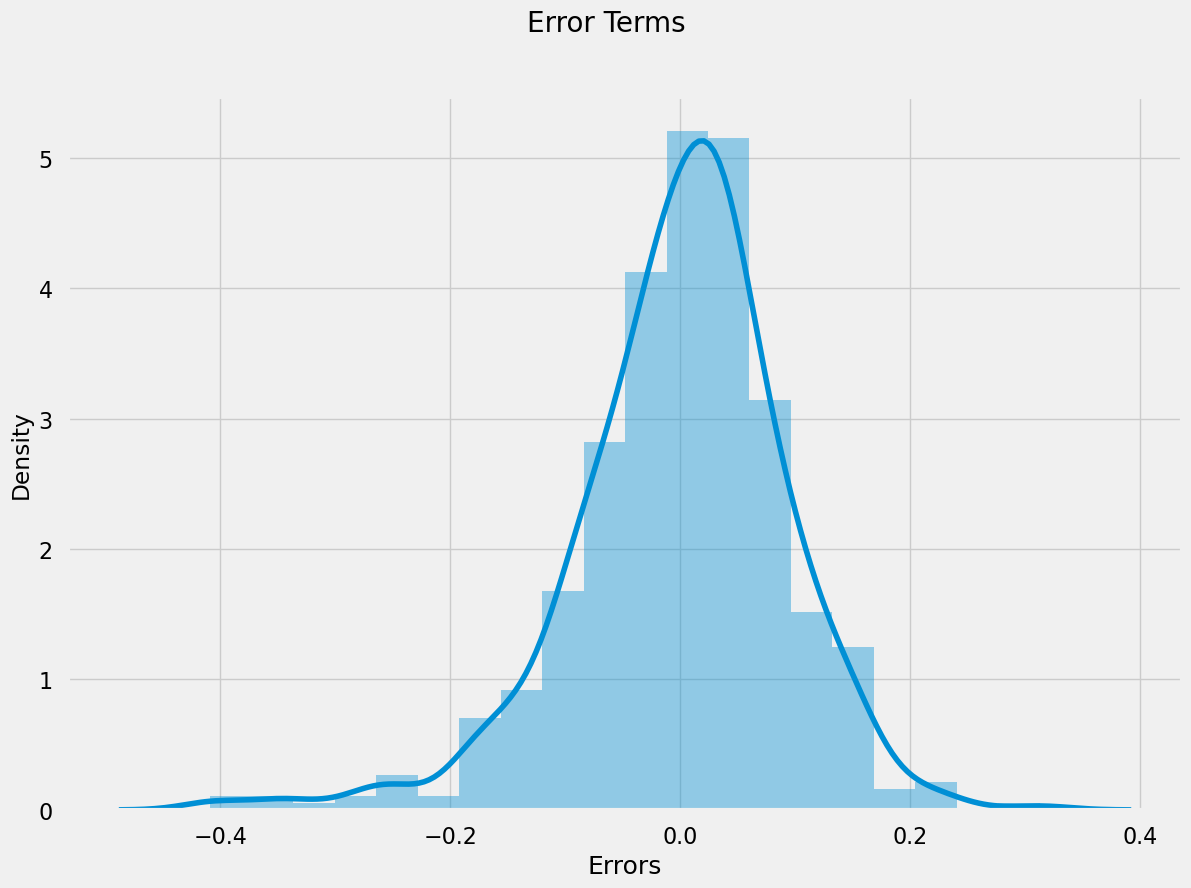

In [123]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)               
plt.xlabel('Errors', fontsize = 18)
plt.show()

In [125]:
# 2_score for train dataset
r2_train = r2_score(y_true=y_train, y_pred=y_train_pred)
print("R2 score for train data:", r2_train)

R2 score for train data: 0.8314475422164174


In [126]:
# Adjusted R2_score for train dataset
n = X_train_rfe4.shape[0]
p = X_train_rfe4.shape[1]

adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
print("Adjusted R2 for train data: ", adjusted_r2_train)

Adjusted R2 for train data:  0.8277319569746951


<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
             Prediction
            </span>   
        </font>    
</h3>

Now as we have fitted the model and checked the normality of error terms, now prediction with final model (Model 4) can be made.

In [131]:
# Applying the scaling on the test data
num_vars = ['atemp','temp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [132]:
# Splitting into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [133]:
X_test.shape

(219, 29)

In [135]:
# Selecting the variables that were part of final model.
var_part_of_final_model = X_train_rfe.columns
X_test = X_test[var_part_of_final_model]
# Adding constant variable to test dataframe
X_test_new = sm.add_constant(X_test)
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   const                                          219 non-null    float64
 1   season_summer                                  219 non-null    uint8  
 2   season_winter                                  219 non-null    uint8  
 3   mnth_sept                                      219 non-null    uint8  
 4   weathersit_Light rain_Light snow_Thunderstorm  219 non-null    uint8  
 5   weathersit_Mist_cloudy                         219 non-null    uint8  
 6   weekday_Monday                                 219 non-null    uint8  
 7   weekday_Tuesday                                219 non-null    uint8  
 8   yr                                             219 non-null    int64  
 9   temp                                           219 no

In [136]:
# Prediction for test dataset
y_test_pred= lr_model4.predict(X_test_new)

In [137]:
# r2_score for test dataset
r2_test = r2_score(y_true=y_test, y_pred=y_test_pred)
print("R_2 score for test data:",r2_test)

R_2 score for test data: 0.7927051180170445


In [138]:
# Adjusted R2 for test dataset
n = X_test_new.shape[0]
p = X_test_new.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
print("Adjusted R2 for test data: ",adjusted_r2_test)

Adjusted R2 for test data:  0.7816894479599792


<a id="clean"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            8. Model Evaluation
            </span>   
        </font>    
</h2>

- Let's now plot the graph for actual versus predicted values

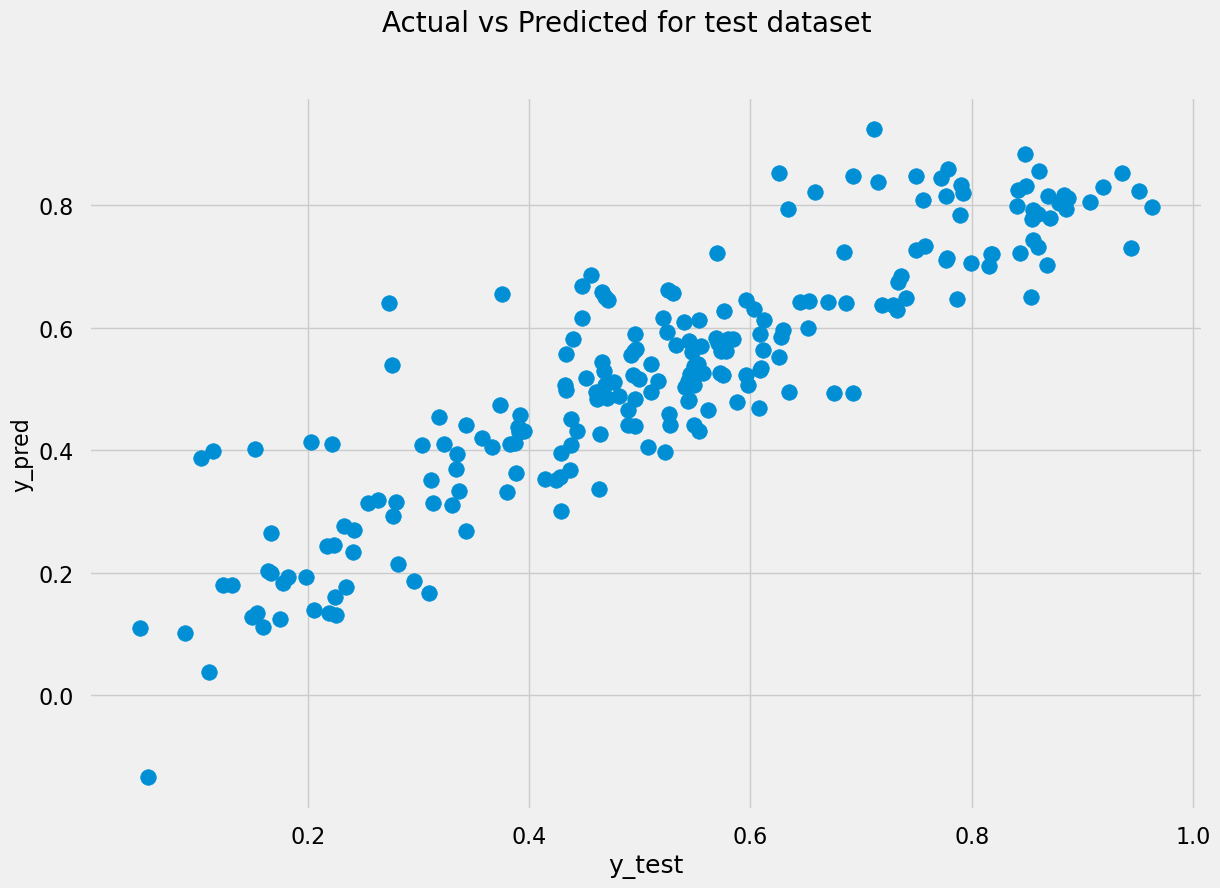

In [141]:
# Plotting scatter plot to understand spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('Actual vs Predicted for test dataset', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)
plt.show()

In [143]:
param = pd.DataFrame(lr_model4.params)
param.insert(0,'Variables', param.index)
param.rename(columns={0:'Coefficient value'}, inplace = True)
param['index'] = list(range(0,11))
param.set_index('index', inplace=True)
param.sort_values(by='Coefficient value', ascending= False, inplace=True)
param

,Variables,Coefficient value
index,,
9,temp,0.553041
8,yr,0.233942
2,season_winter,0.130725
0,const,0.125525
3,mnth_sept,0.095713
1,season_summer,0.089440
6,weekday_Monday,0.014907
7,weekday_Tuesday,-0.044111
5,weathersit_Mist_cloudy,-0.079034


## Final Result Comparison
- **Train R2 score** : 0.83
- **Train Adjusted R2 score** : 0.82
- **Test R2 score** : 0.79
- **Test Adjusted R2 score** : 0.78

This seems to be a really good model.

## Final Report
We can see that the equation of our best fitted line is:

**cnt = 0.23×yr + 0.55×temp - 0.15×windspeed + 0.13×season_winter + 0.08xseason_summer + 0.09×mnth_sept + 0.01×weekday_Monday - 0.044xweekday_Tuesday - 0.07×weathersit_Mist_cloudy - 0.28xweathersit_Light_rain_Light snow_Thunderstorm + 0.12**

**The Significant variables to predict the demand for shared bikes are:**

- yr
- temp
- windspeed
- Season (winter, summer)
- months (sept)
- Weather (Light rain_Light snow_Thunderstorm, Mist_cloudy)
- weekday (Monday, Tuesday)


1. As per our final Model, the top 3 predictor variables that influences the bike booking are:

    **Temperature (temp)** - A coefficient value is ‘0.553041’ which indicates that a unit increase in temp variable increases the bike hire numbers by 0.553041 units.

    **Weather Situation (Light rain_Light snow_Thunderstorm)** - A coefficient value is '-0.284184' which indicates that, w.r.t , Light rain_Light snow_Thunderstorm, a unit increase in Light rain_Light snow_Thunderstorm variable decreases the bike hire numbers by 0.284184 units.

    **Year (yr)** - A coefficient value is ‘0.233942’ which indicates that a unit increase in yr variable increases the bike hire numbers by 0.233942 units.

    So, it is suggested to consider the above feature atmost importance while planning to achieve maximum Bookings.


2. The next best features that can be considered are:
    	
    **season_winter** - A coefficient value is '0.130725' which indicates that a unit increase in winter variable, increase in bike hire by 0.130725 units
    
    **windspeed** - A coefficient value is '-0.156555' which indicates that a unit increase in windspeed variable, decrease in bike hire by 0.156555
